In [8]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/04_solvent_chi_pore/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.cm import get_cmap

from create_in import create_in
from out_reader import out_reader

In [9]:
Cs = 0.04
chi_range = [0, 0.2, 0.5, 0.8, 1]
alpha = 0
S = 150

D = 250
N = 300
chi_surf = -0.3

In [10]:
def compute_profiles(chi_range, alpha):
    phi_SCF = {}
    for chi in chi_range:
        # Генерируем имя файла и создаем SCF-инпут
        file_name_pro = create_in(
            template_pore='/home/tpopova/prj/PB_SCF/04_solvent_chi_pore/scf_templates/pore_chi.in',
            range_param='chi',
            min_val=0.1,
            max_val=0.1,
            Cs=Cs,
            chi=chi,
            chi_surf=chi_surf,
            D=D,
            N=N,
            S=S,
            alpha=alpha,
        )
        
        # Парсим профили
        phi_brush, phi_end_brush = out_reader(file_names=file_name_pro)
        
        # Сохраняем результаты
        coord = np.arange(D)
        phi_SCF[chi] = (coord, phi_brush)
    return phi_SCF

In [11]:
# Расчет профилей для двух случаев alpha
phi_SCF_alpha_0_5 = compute_profiles(chi_range, alpha=0.35)
phi_SCF_alpha_0 = compute_profiles(chi_range, alpha=0)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.897308e+00 |g| = 4.415108e+00 alpha = 1.000000e+00 
hessian scaling: 1.51016
it =  1  E = 1.683181e+00 |g| = 3.822257e+00 alpha = 1.226495e-01 
it =  2  E = 1.815061e+00 |g| = 4.019340e+00 alpha = 1.042064e-01 
it =  3  E = 2.054961e+00 |g| = 3.511203e+00 alpha = 6.602692e-02 
it =  4  E = 1.873347e+00 |g| = 3.131052e+00 alpha = 6.608506e-02 
it =  5  E = 1.396716e+00 |g| = 3.055264e+00 alpha = 1.087324e-01 
it =  6  E = 1.685750e+00 |g| = 2.565748e+00 alpha = 5.871518e-02 
it =  7  E = 1.022531e+00 |g| = 2.530081e+00 alpha = 1.489314e-01 
it =  8  E = 1.399263e+00 |g| = 2.016305e+00 alpha = 5.980905e-02 
it =  9  E = 7.603558e-01 |g| = 1.996255e+00 alpha = 1.910932e-01 
it =  10  E = 1.004642e+00 |g| = 1.509030e+00

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2284969/465038703.py:7: SyntaxWarning: invalid escape sequence '\c'
  axes[0].plot(coord, phi_brush, label=f"$\chi$ = {chi}", linewidth=2)
/tmp/ipykernel_2284969/465038703.py:16: SyntaxWarning: invalid escape sequence '\c'
  axes[1].plot(coord, phi_brush, label=f"$\chi$ = {chi}", linewidth=2)


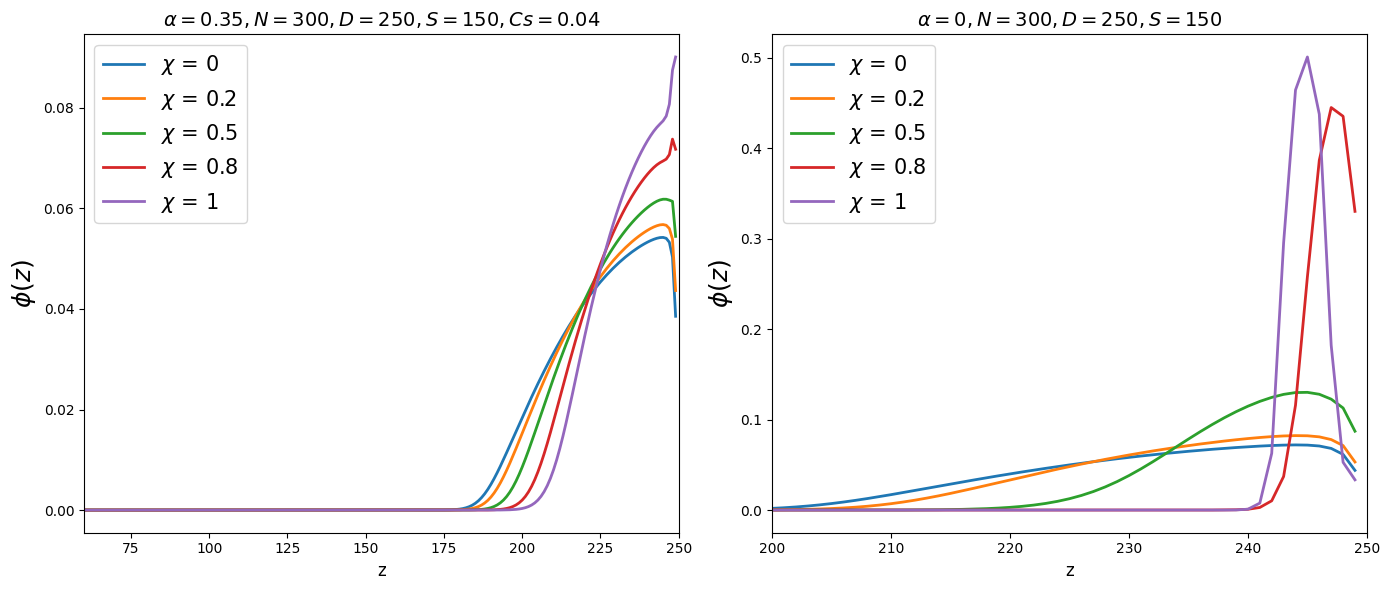

In [ ]:
# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График для alpha = 0.5
axes[0].set_title(f"$\\alpha = 0.35, N = {N}, D = {D}, S = {S}, Cs = {Cs}$", fontsize=14)
for chi, (coord, phi_brush) in phi_SCF_alpha_0_5.items():
    axes[0].plot(coord, phi_brush, label=f"$\chi$ = {chi}", linewidth=2)
axes[0].set_xlabel("z", fontsize=12)
axes[0].set_ylabel(r"$\phi(z)$", fontsize=18)
axes[0].set_xlim(60, D)
axes[0].legend(fontsize=15)

# График для alpha = 0
axes[1].set_title(f"$\\alpha = 0, N = {N}, D = {D}, S = {S}$", fontsize=14)
for chi, (coord, phi_brush) in phi_SCF_alpha_0.items():
    axes[1].plot(coord, phi_brush, label=f"$\chi$ = {chi}", linewidth=2)
axes[1].set_xlabel("z", fontsize=12)
axes[1].set_ylabel(r"$\phi(z)$", fontsize=18)
axes[1].set_xlim(200, D)
axes[1].legend(fontsize=15)

# Настройки и отображение
plt.tight_layout()
# plt.savefig('high_cs_alpha_0.35.pdf', dpi=300, bbox_inches='tight')
plt.show()